# Introduction
#### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.



In [1]:
## Import neccessary libraries
import pandas as pd
import numpy as np
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from statsmodels.api import qqplot
import warnings 
warnings.simplefilter('ignore')
sns.set_style('whitegrid')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Accessing the data

In [2]:
#read the csv into bike_df
bike_df = pd.read_csv(r"C:\Users\HP\Downloads\SeoulBikeData.csv", parse_dates =['Date'])

In [3]:
# preview the datasets
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(�C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(�C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [84]:
bike_df.describe()

,rented_bike_count,hour,temperature,humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
bike_df.describe(include='O')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Summer,No Holiday,Yes
freq,2208,8328,8465


In [7]:
# check for null values
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Observation: There are no null values or empty row

In [8]:
# check for duplicated rows
bike_df.duplicated().sum()

0

In [9]:
# total rows and columns:
print(f'rows and colums of the dataset are {(bike_df.shape)} respectively')

rows and colums of the dataset are (8760, 14) respectively


Observation There are no duplicated rows in the dataset

## Wrangling

In [10]:
# replace No holiday and Holiday with No and Yes respectively
bike_df['Holiday'] = bike_df['Holiday'].replace(['No Holiday','Holiday'],['No','Yes'])

In [11]:
bike_df  = bike_df.rename(columns= {'Temperature(�C)':'Temperature','Dew point temperature(�C)':'Dew point temperature(C)'})

In [12]:
bike_df.columns = bike_df.columns.str.replace(' ','_')
bike_df.columns= bike_df.columns.str.lower()

In [13]:
## Distribute the hours into diffrent categories of the day: MOrning, Aftrnoon, Evening, Night
def day_cat(x):
    if x >=5 and x <= 12:
        return 'Morning'
    elif x > 12 and x <= 17:
        return 'Afternoon'
    elif x > 17 and x <=21 :
        return 'Evening'
    else:
        return 'Night'

In [14]:
bike_df['day_time'] = bike_df['hour'].apply(day_cat)

In [15]:
bike_df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day', 'day_time'],
      dtype='object')

In [16]:
bike_df = bike_df[['date', 'rented_bike_count', 'hour','day_time', 'temperature', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day']]

## Exploratory Data Analysis (EDA)

In [17]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

### What's the time frame of the dataset?

In [18]:
min = bike_df['date'].min()
max = bike_df['date'].max()
print(f'The time frame for this dataset is between {min} and {max}')

The time frame for this dataset is between 2017-01-12 00:00:00 and 2018-12-11 00:00:00


### The total count of time bikes that has been rented out within this time frame

In [19]:
print('the total count of bikes rented out with the provided timeframe is '+ str(bike_df['rented_bike_count'].sum()) + ' times' )

the total count of bikes rented out with the provided timeframe is 6172314 times


### Average number of bikes rented per day

In [20]:
time_diff = (max-min).days
total_bike_count = bike_df['rented_bike_count'].sum()
average = total_bike_count//time_diff
print(f'About {average} bikes were rented daily on an average')

About 8842 bikes were rented daily on an average


### Season with the most bike rentals

In [21]:
bike_df.groupby('seasons')['rented_bike_count'].sum()

seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: rented_bike_count, dtype: int64

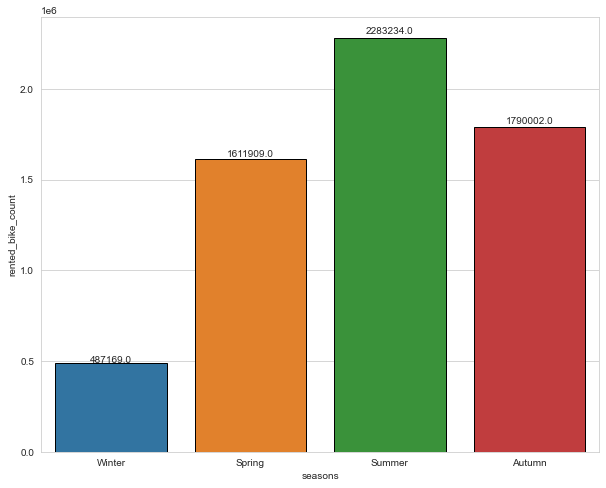

In [22]:
fig,ax =plt.subplots(figsize=(10,8))
ax= sns.barplot(data=bike_df,x='seasons',y='rented_bike_count',ci=None, estimator=np.sum, edgecolor='Black')
show_values(ax,space=0.5)

### Visualize the temperature distribution across the seasons

Text(0, 0.5, 'Temperature(C)')

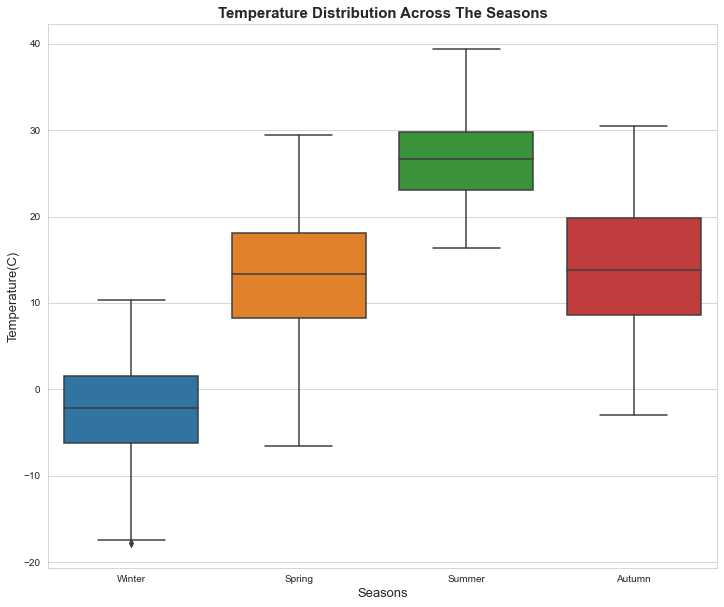

In [69]:
fig,ax =plt.subplots(figsize=(12,10))
sns.boxplot(data=bike_df, x='seasons', y='temperature')
plt.title('Temperature Distribution Across The Seasons',fontsize=15, weight ='bold')
plt.xlabel('Seasons',fontsize=13)
plt.ylabel('Temperature(C)', fontsize=13)

Observation: Obviously Winter had the lowest temeprature, while Summer was the warmest.

In [23]:
### what is the most common season
print(f'These are the number of days for each season;')
season_unique= bike_df['seasons'].unique()
value = bike_df.groupby('seasons')['date'].nunique().reindex(['Winter', 'Spring', 'Summer', 'Autumn']).to_dict().values()
for season, val in zip(season_unique,value):
    print(f'{season} has {val} days')

These are the number of days for each season;
Winter has 90 days
Spring has 92 days
Summer has 92 days
Autumn has 91 days


### Days operations weren't functioning,How many were due to holidays and no holidays

In [24]:
non_function = bike_df[bike_df['functioning_day']== 'No']
non_function

,date,rented_bike_count,hour,day_time,temperature,humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day
3144,2018-11-04,0,0,Night,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No,No
3145,2018-11-04,0,1,Night,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No,No
3146,2018-11-04,0,2,Night,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No,No
3147,2018-11-04,0,3,Night,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No,No
3148,2018-11-04,0,4,Night,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-09-11,0,19,Evening,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No,No
8252,2018-09-11,0,20,Evening,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No,No
8253,2018-09-11,0,21,Evening,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No,No
8254,2018-09-11,0,22,Night,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No,No


In [25]:
non_function.groupby(['seasons','holiday'])['date'].count().map(lambda x: x//24)

seasons  holiday
Autumn   No         9
         Yes        1
Spring   No         2
Name: date, dtype: int64

Observation: There were 10 days in Autumn and 2 days in Spring where the bike rentals services were non-functional, of which only a daymwas due to holiday

In [26]:
# lets try to find the day in which services was altered as a result of holiday
non_function[non_function['holiday']=='Yes']['date'].unique()

array(['2018-09-10T00:00:00.000000000'], dtype='datetime64[ns]')

Observation:
The date was 9th of October, 2018. The South Korean government, established in 1945, declared October 9 to be Hangeul Day, a yearly legal holiday which excused government employees from work.

### Day time distribution of total bikes rented

In [27]:
bike_df.groupby('day_time')['rented_bike_count'].sum().sort_values(ascending=False)

day_time
Evening      1751448
Morning      1650695
Afternoon    1602492
Night        1167679
Name: rented_bike_count, dtype: int64

Observation: More people tends to ride bikes in the evening that any other time of the day, this could be as result of people enjoying their leisure time after work or school.

<AxesSubplot:title={'center':'Percentage of Bikes Rented by Day Time'}>

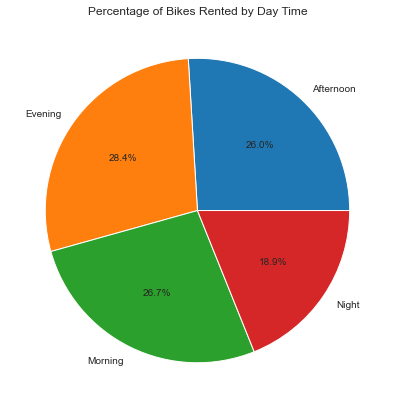

In [28]:
bike_df.groupby('day_time')['rented_bike_count'].sum().plot(kind='pie',autopct='%.1f%%',figsize=(10,7), ylabel='', title='Percentage of Bikes Rented by Day Time')

It's obvious people don't really like to ride after dark

### Trends of rented bikes by hour

In [29]:
# trends of rented bikes by hour
hr = bike_df.pivot_table(index='hour', values='rented_bike_count', aggfunc=np.sum)
hr

,rented_bike_count
hour,
0,197633
1,155557
2,110095
3,74216
4,48396
5,50765
6,104961
7,221192
8,370731


Text(0, 0.5, 'Total Bikes')

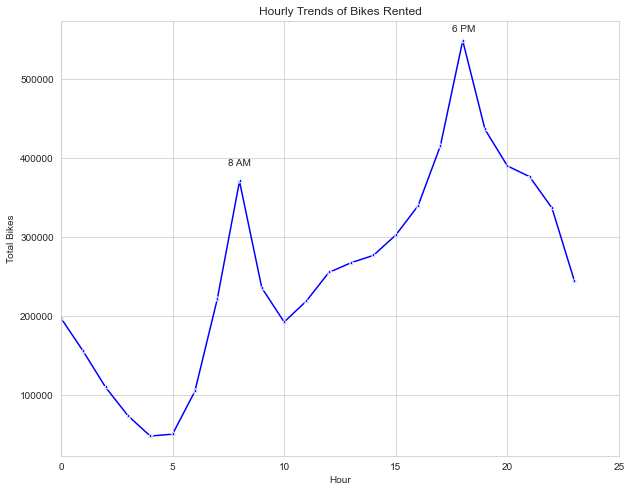

In [30]:
fig, ax= plt.subplots(figsize=(10,8))
sns.lineplot(data=hr, x='hour',y='rented_bike_count', color='b', marker= '*',ax=ax)
plt.xlim(0,25)
plt.annotate('8 AM',xy=(8,370731),xytext=(7.5,390000))
plt.annotate('6 PM',xy=(18,548568),xytext=(17.5,560000))
plt.title('Hourly Trends of Bikes Rented')
plt.xlabel('Hour')
plt.ylabel('Total Bikes')

Observation: Our hourly trend graph seems to peaked at 2 seperate hour, which are 8 AM and 6 PM, this likely signifies bikes rented by people to and from work.

### Trends of rented bikes by hour and  season

In [31]:
# trends of rented bikes by hour and season
season_hr = bike_df.pivot_table(index='hour',columns='seasons',values='rented_bike_count', aggfunc=np.sum)
season_hr

seasons,Autumn,Spring,Summer,Winter
hour,,,,
0,56755,43298,82714,14866
1,44200,32755,64287,14315
2,30198,22767,46529,10601
3,20524,15163,31526,7003
4,13522,9740,20591,4543
5,13073,10456,22626,4610
6,28759,23151,44697,8354
7,63899,55376,83056,18861
8,108948,93274,130511,37998


Text(0, 0.5, 'Total Bikes')

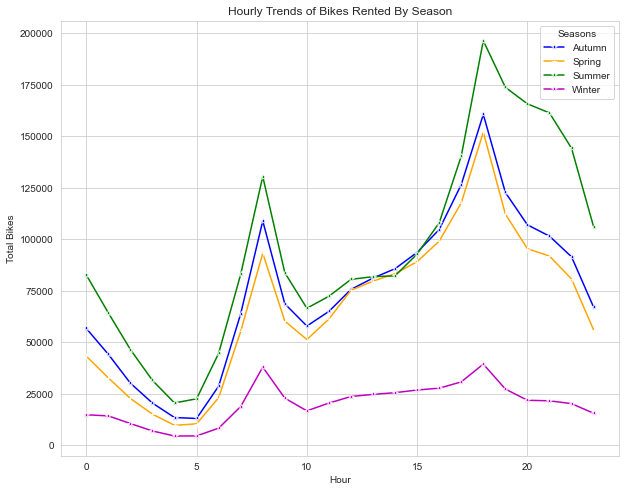

In [32]:
fig= plt.figure(figsize=(10,8))
sns.lineplot(data=season_hr, x='hour',y='Autumn', color='b', marker= '*',label='Autumn')
sns.lineplot(data=season_hr, x='hour',y='Spring', color='Orange', marker= '+',label='Spring')
sns.lineplot(data=season_hr, x='hour',y='Summer', color='green', marker= '*',label='Summer')
sns.lineplot(data=season_hr, x='hour',y='Winter', color='m', marker= '*',label='Winter')
plt.legend(title='Seasons')
plt.title('Hourly Trends of Bikes Rented By Season')
plt.xlabel('Hour')
plt.ylabel('Total Bikes')

Observation: Generally more people tends to rent bikes and ride even later than any other seasons. Winter has the least number of riders, even I wouldn't want to ride a bike in that weather.

### Direction and Relationship between Features

In [33]:
correlation = bike_df.corr()

Text(0.5, 1.05, 'Heatmap Showing Strength and Direction of Correlation')

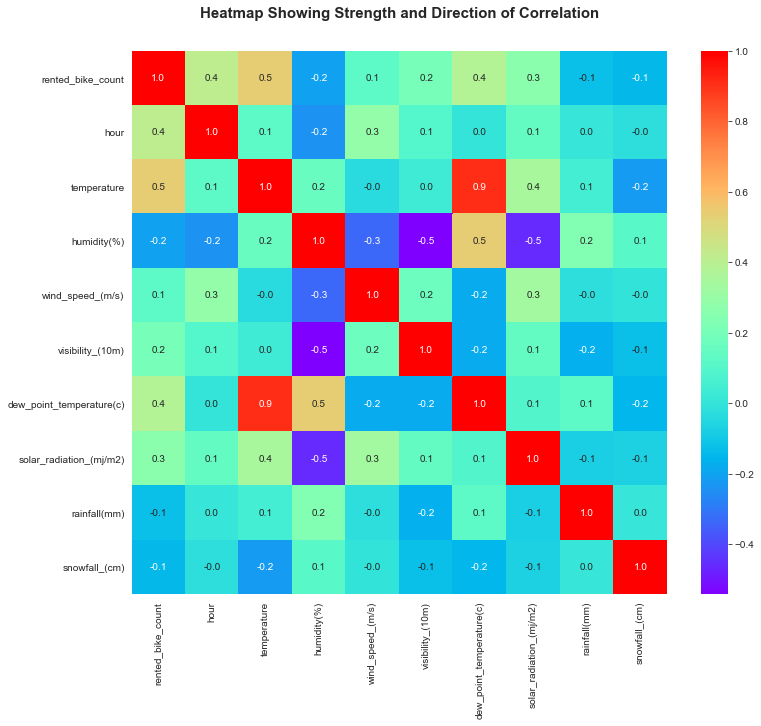

In [46]:
fig,ax= plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation, annot=True,cmap='rainbow',cbar=True,fmt='.1f')
plt.title('Heatmap Showing Strength and Direction of Correlation', fontsize= 15, weight='bold', y=1.05)

Observation: There seems to be a weak positve relationship between counts of rented bikes and hour, temperature respectively.

# Simple Linear Regression
### This is a simple linear regression to check whether the tempersture can accurately predict a linear relationship with the amount of bikes rented

In [35]:
bike= bike_df.copy()

<AxesSubplot:xlabel='temperature', ylabel='rented_bike_count'>

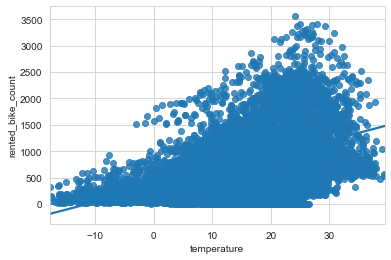

In [36]:
sns.regplot(data=bike, x='temperature',y='rented_bike_count', ci=None)

<AxesSubplot:xlabel='temperature', ylabel='rented_bike_count'>

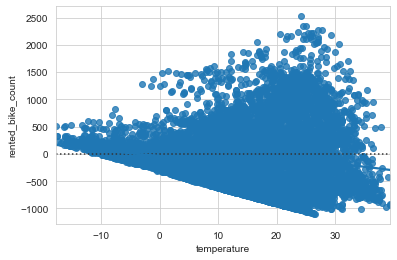

In [37]:
sns.residplot(data=bike, x='temperature',y='rented_bike_count', lowess=True)

In [38]:
# MOdel
model = ols('rented_bike_count ~ temperature', data=bike).fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rented_bike_count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:33:29   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     329.9525      8.541     38.631      0.000     313.210     346.695
temperature    29.0811      0.486     59.816      0.000      28.128      30.034
==============================================================================
Omnibus:                      954.681   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.965
Skew:                           0.817   Prob(JB):                    1.68e-309
Kurtosis:                       4.108   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
print(f'The model has a weak and low fit of {np.round(model.rsquared,3)}, suggesting that response variable (rented bike count) cannot be accuractely predicted by the explanatory variable(temperature)')

The model has a weak and low fit of 0.29, suggesting that response variable (rented bike count) cannot be accuractely predicted by the explanatory variable(temperature)


In [39]:
model.resid

0        75.269201
1        33.993530
2        17.534080
3       -42.649700
4       -77.465920
           ...    
8755    550.906870
8756    335.171749
8757    288.436629
8758    320.977178
8759    198.793398
Length: 8760, dtype: float64

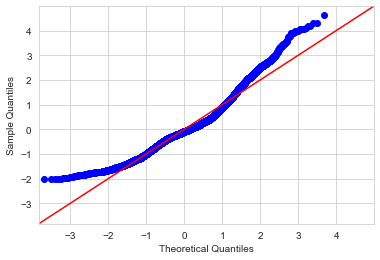

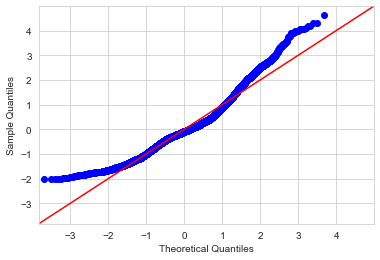

In [40]:
qqplot(data=model.resid, fit=True, line='45')

Observation: The model residual does not make a good fit, so therefore, a more complicated multiexplanatory variables linear regression is need for this analysis.

## Leverage and Influence

In [74]:
summary_model = model.get_influence().summary_frame()
bike['leverage'] = summary_model['hat_diag']
bike['cooks_dist'] = summary_model['cooks_d']

In [81]:
bike[['temperature','rented_bike_count','leverage','cooks_dist']]

,temperature,rented_bike_count,leverage,cooks_dist
0,-5.2,254,0.000376,3.606609e-06
1,-5.5,204,0.000385,7.527742e-07
2,-6.0,173,0.000399,2.080514e-07
3,-6.2,107,0.000406,1.249677e-06
4,-6.0,78,0.000399,4.060936e-06
...,...,...,...,...
8755,4.2,1003,0.000174,8.966744e-05
8756,3.4,764,0.000186,3.540331e-05
8757,2.6,694,0.000199,2.800182e-05
8758,2.1,712,0.000207,3.614737e-05
